# Label Subgoals
- Label each frame with current subgoal 
- Extract order of subgoals visited 
- Only include visited subgoals as true subgoals 

Result: `subgoal_order = [8, 6, 1, 0, 2, 7, 9]`


In [1]:
import os
import random

import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


SIGMA = (210 / 44.6, 160 / 28.5)

GPU_DEVICE = 3

os.environ['CUDA_VISIBLE_DEVICES']=str(GPU_DEVICE)

DATA_PATH = '/datasets/public/anna/montezuma_revenge'

### Load labeled data and extracted subgoals 

In [2]:
%%time 
df = pd.read_pickle(os.path.join(DATA_PATH, "all_trials_labeled.pkl"))


init_screen = cv2.imread(df.iloc[0].img_path)
init_screen = cv2.cvtColor(init_screen, cv2.COLOR_BGR2RGB)
SUBGOALS = np.loadtxt('subgoals.txt', dtype=int, delimiter=',')

dim = (init_screen.shape[1] * 2, init_screen.shape[0] * 2)
img = cv2.resize(init_screen.copy(), dim, interpolation = cv2.INTER_AREA)


df.head()

CPU times: user 11.2 s, sys: 3.94 s, total: 15.2 s
Wall time: 15.2 s


ID      frame_id episode_id score duration(ms)  \
0  284_RZ_5540489_E00  RZ_5540489_1          0     0         2817   
1  284_RZ_5540489_E00  RZ_5540489_2          0     0           50   
2  284_RZ_5540489_E00  RZ_5540489_3          0     0           51   
3  284_RZ_5540489_E00  RZ_5540489_4          0     0           51   
4  284_RZ_5540489_E00  RZ_5540489_5          0     0           55   

  unclipped_reward action                                     gaze_positions  \
0                0      0  [[80.4, 103.5], [80.34, 103.4], [80.34, 103.3]...   
1                0      0  [[113.66, 98.28], [113.65, 98.42], [113.65, 98...   
2                0      0  [[87.26, 100.72], [86.4, 100.8], [85.61, 100.8...   
3                0      0  [[78.41, 101.5], [78.41, 101.5], [78.41, 101.6...   
4                0      0  [[78.41, 102.85], [78.42, 102.95], [78.41, 102...   

                                            img_path level  ...  \
0  /datasets/public/anna/montezuma_revenge/284_RZ...     0  ...   
1  /datasets/public/anna/montezuma_revenge/284_RZ...     0  ...   
2  /datasets/public/anna/montezuma_revenge/284_RZ...     0  ...   
3  /datasets/public/anna/montezuma_revenge/284_RZ...     0  ...   
4  /datasets/public/anna/montezuma_revenge/284_RZ...     0  ...   

  player_location skull_location num_gaze_positions  gaze_duration_ratio  \
0        [77, 85]      [92, 175]             2614.0             0.927938   
1        [77, 85]      [92, 175]               50.0             1.000000   
2        [77, 85]      [92, 175]               51.0             1.000000   
3        [77, 85]      [92, 175]               51.0             1.000000   
4        [77, 85]      [91, 175]               55.0             1.000000   

                           angular_gaze_displacement  \
0  [8.986148924666498, 0.00034557292731263054, 0....   
1  [8.986165402283532, 0.00044873289690316374, 0....   
2  [8.986150521057317, 0.0029062899985003087, 0.0...   
3  [8.986146988240504, 0.00041474113941382504, 0....   
4  [8.986147775662209, 7.822521255579121e-05, 0.0...   

                                       gaze_velocity max_gaze_velocity  \
0  [96840.02112006705, 3.724096925170927, 2.97928...            266.07   
1  [89861.65402283533, 4.487328969031638, 0.0, 3....            114.40   
2  [89861.50521057317, 29.06289998500309, 21.2663...            102.50   
3  [89861.46988240504, 4.14741139413825, 7.982843...            102.88   
4  [89861.47775662209, 0.7822521255579121, 2.8601...            103.92   

   avg_gaze_velocity                                        time_stamps  \
0          95.051218  [0.0, 0.9279375221867234, 1.8558750443734469, ...   
1         104.255400  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
2          90.330686  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
3          90.392941  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
4          90.895364  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   

  current_subgoal  
0               8  
1               8  
2               8  
3               8  
4               8  

[5 rows x 21 columns]

## Visualize extracted order

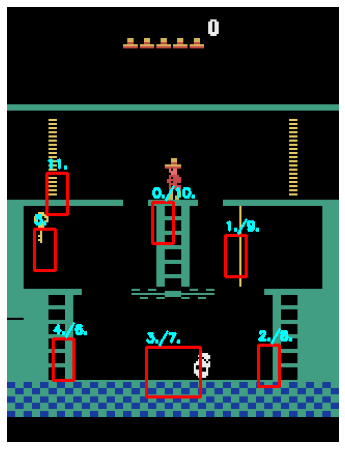

In [3]:
subgoal_order = np.array([8, 6, 1, 0, 2, 7, 2, 0, 1, 6, 8, 9])

for i, box in enumerate(SUBGOALS):
    
    #img = cv2.putText(img=img, text=str(i), org=(int(box[0]), int(box[1])), fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                        #fontScale=0.3, color=(255, 255, 255),thickness=1)
    
    if i in subgoal_order:
        box = box.copy() * 2
        img = cv2.rectangle(img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (255,0,0), 2)
        idx = np.where(subgoal_order == i)[0]
        img = cv2.putText(img=img, text='/'.join([f'{n}.' for n in idx]), org=(int(box[0]), int(box[1]) - 5), fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                        fontScale=0.4, color=(0, 255, 255), thickness=2)

        # text='[' + ','.join([str(n) for n in idx]) + ']'
        
fig = plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')
plt.savefig('visualizations/subgoals_labeled.png', bbox_inches='tight')
plt.show()

In [4]:
def agent_in_subgoal(subgoals, agent_x, agent_y): 

    test_min_x = subgoals[:, 0] < agent_x 
    test_max_x = subgoals[:, 2] > agent_x

    test_min_y = subgoals[:, 1] < agent_y
    test_max_y = subgoals[:, 3] > agent_y

    return np.any(test_min_x & test_max_x & test_min_y & test_max_y), np.where(test_min_x & test_max_x & test_min_y & test_max_y)[0]

In [28]:
%%time
screen = [0,0, 160, 210]

counter = 0

subgoal_count = 0 
out_screen = 0 

areas_count = {}
for k in range(3):
    areas_count[k] = 0 
    

for episode in df.ID.unique():
    
    valid_actions_idx = df.loc[df.ID == episode].loc[df.room_id == 1].loc[df.level==0].index
    
    if len(valid_actions_idx) > 0: 
        
        temp_df = df.iloc[valid_actions_idx]
        
        for i, frame in temp_df.iterrows():
            if not frame.gaze_positions is None: 
                
                mean_x, mean_y = frame.skull_location
                
                # x1, x2, y1, y2 
                skull_area = [mean_x - 5, mean_y - 15, mean_x + 10, mean_y + 10]
                
                mean_x, mean_y = frame.player_location
                agent_area = [mean_x - 5, mean_y - 15, mean_x + 10, mean_y + 10]
                agent_vicinity = [mean_x - 10, mean_y - 30, mean_x + 20, mean_y + 20]
                
                for gaze_points in frame.gaze_positions:
                    counter += 1
                    
                    if agent_in_subgoal(SUBGOALS, gaze_points[0], gaze_points[1])[0]: 
                        subgoal_count += 1
                        
                    if not agent_in_subgoal(np.expand_dims(screen, axis=0), gaze_points[0], gaze_points[1])[0]:
                        out_screen += 1
                    
                    check, idx = agent_in_subgoal(np.stack([skull_area, agent_area, agent_vicinity]), 
                                                  gaze_points[0], gaze_points[1])
                    if check: 
                        for k in idx: 
                            areas_count[k] += 1
                            
print(f'Percentage on subgoals {subgoal_count / counter:%}')
print(f'Percentage not on screen {out_screen / counter:%}')
print(f'Percentage on skull {areas_count[0] / counter:%}')
print(f'Percentage on agent {areas_count[1] / counter:%}')
print(f'Percentage on agent vicinity {areas_count[2] / counter:%}')

Percentage on subgoals 56.721905%
Percentage not on screen 1.566032%
Percentage on skull 8.218883%
Percentage on agent 32.611321%
Percentage on agent vicinity 68.234675%
CPU times: user 1min 7s, sys: 1.19 s, total: 1min 8s
Wall time: 1min 11s


In [31]:
out_screen, counter

(10829, 691493)

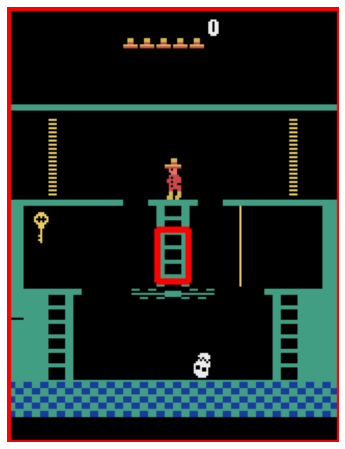

In [27]:
img = init_screen.copy()
img = cv2.rectangle(img, (int(agent_area[0]), int(agent_area[1])), (int(agent_area[2]), int(agent_area[3])), (255,0,0), 2)
img = cv2.rectangle(img, (0,0), (160, 210), (255,0,0), 2)
       
        
fig = plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')

plt.show()

### Run Simulation

In [9]:
import gym
from atariari.benchmark.wrapper import AtariARIWrapper


env = AtariARIWrapper(gym.make('MontezumaRevenge-v4', 
                       frameskip=1, 
                       render_mode='rgb_array', 
                       repeat_action_probability=0.0))

#env.unwrapped.ale.getRAM()
obs = env.reset(seed=42)
obs, reward, done, info = env.step(1)

A.L.E: Arcade Learning Environment (version 0.7.5+db37282)
[Powered by Stella]


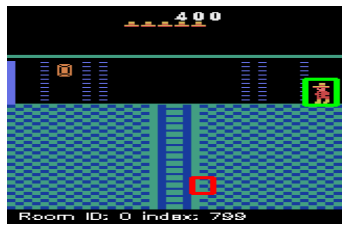

In [11]:
from IPython import display
obs = env.reset()

#fig = plt.figure(figsize=(10, 8))
screen = plt.imshow(env.render(mode='rgb_array'), aspect='auto')
plt.axis('off')

all_images = []
agent_locations = []
skull_locations = []
room_ids = []

subgoal_anno = []


for i, action in enumerate(df.loc[df.ID == '285_RZ_5619207_E00'].action.values[:800]): 
    #print(action)
    n_state, reward, done, info = env.step(action)
    img = info['rgb']
    room_ids.append(info['labels']['room_number'])
    
    # agent 
    mean_x, mean_y = info['labels']['player_x'], 320 - info['labels']['player_y']
    agent_locations.append([mean_x, mean_y])
    check, goal_idx = agent_in_subgoal(SUBGOALS, mean_x, mean_y)
    if check: 
        
        box = SUBGOALS[goal_idx][0]
        
        subgoal_anno += [goal_idx[0]] * (i - len(subgoal_anno))
        
        img = cv2.rectangle(img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0,0,255), 1)
        
    x1, x2, y1, y2 = mean_x - 5 , mean_x + 10, mean_y - 15, mean_y + 10
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
    
    # skull
    mean_x, mean_y = info['labels']['enemy_skull_x'] + 35, info['labels']['enemy_skull_y'] - 65
    skull_locations.append([mean_x, mean_y])
    x1, x2, y1, y2 = mean_x - 5, mean_x + 5, mean_y - 10, mean_y + 5
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)
    
    img = cv2.putText(img=img, text='Room ID: ' + str(info['labels']['room_number']) + ' index: ' + str(i), org=(5, 205), fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                        fontScale=0.3, color=(255, 255, 255),thickness=1)
        
    screen.set_data(img) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [14]:
%%time 
df['current_subgoal'] = None 

for episode in df.ID.unique():
    
    obs = env.reset()
    subgoal_anno = []
    
    valid_actions_idx = df.loc[df.ID == episode].loc[df.room_id == 1].loc[df.level==0].index
    
    if len(valid_actions_idx) > 0: 

        for i, action in enumerate(df.iloc[valid_actions_idx].action.values): 

            n_state, reward, done, info = env.step(action)

            # agent 
            mean_x, mean_y = info['labels']['player_x'], 320 - info['labels']['player_y']

            check, goal_idx = agent_in_subgoal(SUBGOALS, mean_x, mean_y)
            if check: 
                box = SUBGOALS[goal_idx][0]
                subgoal_anno += [goal_idx[0]] * (i - len(subgoal_anno))

        subgoal_anno += [None] * (i - len(subgoal_anno) + 1)

        assert len(valid_actions_idx) == len(subgoal_anno), f'{episode, i} Number of actions: {len(valid_actions_idx)} does not match length of subgoal annotation: { len(subgoal_anno)}'

        df.loc[valid_actions_idx, 'current_subgoal'] = subgoal_anno

df.head()

CPU times: user 16.5 s, sys: 182 ms, total: 16.7 s
Wall time: 16.7 s


ID      frame_id episode_id score duration(ms)  \
0  284_RZ_5540489_E00  RZ_5540489_1          0     0         2817   
1  284_RZ_5540489_E00  RZ_5540489_2          0     0           50   
2  284_RZ_5540489_E00  RZ_5540489_3          0     0           51   
3  284_RZ_5540489_E00  RZ_5540489_4          0     0           51   
4  284_RZ_5540489_E00  RZ_5540489_5          0     0           55   

  unclipped_reward action                                     gaze_positions  \
0                0      0  [[80.4, 103.5], [80.34, 103.4], [80.34, 103.3]...   
1                0      0  [[113.66, 98.28], [113.65, 98.42], [113.65, 98...   
2                0      0  [[87.26, 100.72], [86.4, 100.8], [85.61, 100.8...   
3                0      0  [[78.41, 101.5], [78.41, 101.5], [78.41, 101.6...   
4                0      0  [[78.41, 102.85], [78.42, 102.95], [78.41, 102...   

                                            img_path level  ...  \
0  /datasets/public/anna/montezuma_revenge/284_RZ...     0  ...   
1  /datasets/public/anna/montezuma_revenge/284_RZ...     0  ...   
2  /datasets/public/anna/montezuma_revenge/284_RZ...     0  ...   
3  /datasets/public/anna/montezuma_revenge/284_RZ...     0  ...   
4  /datasets/public/anna/montezuma_revenge/284_RZ...     0  ...   

  player_location skull_location num_gaze_positions  gaze_duration_ratio  \
0        [77, 85]      [92, 175]             2614.0             0.927938   
1        [77, 85]      [92, 175]               50.0             1.000000   
2        [77, 85]      [92, 175]               51.0             1.000000   
3        [77, 85]      [92, 175]               51.0             1.000000   
4        [77, 85]      [91, 175]               55.0             1.000000   

                           angular_gaze_displacement  \
0  [8.986148924666498, 0.00034557292731263054, 0....   
1  [8.986165402283532, 0.00044873289690316374, 0....   
2  [8.986150521057317, 0.0029062899985003087, 0.0...   
3  [8.986146988240504, 0.00041474113941382504, 0....   
4  [8.986147775662209, 7.822521255579121e-05, 0.0...   

                                       gaze_velocity max_gaze_velocity  \
0  [96840.02112006705, 3.724096925170927, 2.97928...            266.07   
1  [89861.65402283533, 4.487328969031638, 0.0, 3....            114.40   
2  [89861.50521057317, 29.06289998500309, 21.2663...            102.50   
3  [89861.46988240504, 4.14741139413825, 7.982843...            102.88   
4  [89861.47775662209, 0.7822521255579121, 2.8601...            103.92   

   avg_gaze_velocity                                        time_stamps  \
0          95.051218  [0.0, 0.9279375221867234, 1.8558750443734469, ...   
1         104.255400  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
2          90.330686  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
3          90.392941  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
4          90.895364  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   

  current_subgoal  
0               8  
1               8  
2               8  
3               8  
4               8  

[5 rows x 21 columns]

(37879, 2)


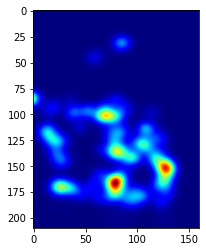

In [15]:
from scipy.ndimage import gaussian_filter
SIGMA = (210 / 44.6, 160 / 28.5)


saliency_map = np.zeros(init_screen.shape[:2])

episode = '284_RZ_5540489_E00'
gaze = df.loc[df.ID == episode].loc[df.room_id == 1].loc[df.level==0].gaze_positions

flat_list = []
for gaze_points in gaze:
    if gaze_points is not None: 
        for item in gaze_points:
            flat_list.append(item)

print(np.array(flat_list).shape)


# Add gaze coordinates to saliency map
for cords in flat_list:
    try: 
        saliency_map[int(cords[1])][int(cords[0])] += 1
    except:
        # Not all gaze points are on image 
        continue
        
# Construct empirical saliency map
saliency_map = gaussian_filter(saliency_map, sigma=SIGMA, mode='nearest')

plt.imshow(saliency_map, cmap='jet')
plt.show()

In [16]:
path = os.path.join(DATA_PATH, "all_trials_labeled.pkl")
df.to_pickle(path) 
print(f'Saved dataframe to {path}')

Saved dataframe to /datasets/public/anna/montezuma_revenge/all_trials_labeled.pkl


In [17]:
all_orders = []
for episode in df.ID.unique(): 
    subgoal_order = df.loc[df.ID == episode].loc[df.room_id == 1].loc[df.level==0].current_subgoal.unique()
    if len(subgoal_order) > 0: 
        all_orders.append(subgoal_order)
        print(episode, subgoal_order)

284_RZ_5540489_E00 [8 6 1 0 2 9 None]
285_RZ_5619207_E00 [8 6 1 0 2 7 9 None]
285_RZ_5619207_E01 [8 6 1 0 2 9 None]
291_RZ_7364933_E00 [8 6 1 0 2 7 9 None]
333_RZ_900705_E00 [8 6 1 0 2 9 None]
340_RZ_1323550_E00 [8 6 1 0 2 7 9 None]
359_RZ_1993616_E00 [8 6 1 0 2 7 9 None]
365_RZ_2079996_E00 [8 6 1 0 2 7 9 None]
371_RZ_2173469_E00 [8 6 1 0 2 7 9 None]
385_RZ_2344725_E00 [8 6 1 0 2 7 9 None]
398_RZ_2530473_E00 [8 6 1 0 2 9 None]
402_RZ_2603283_E00 [8 6 1 0 2 9 None]
416_RZ_2788252_E00 [8 6 1 0 2 7 9 None]
429_RZ_2945490_E00 [8 6 1 0 2 7 9 None]
436_RZ_3131841_E00 [8 6 1 0 2 7 9 None]
459_RZ_3291266_E00 [8 6 1 0 2 7 9 None]
469_RZ_3390904_E00 [8 6 1 0 2 7 9 None]
480_RZ_3470098_E00 [8 6 1 0 2 7 9 None]
493_RZ_3557734_E00 [8 6 1 0 2 7 9 None]


## Get majority vote of subgoal order

In [18]:
from collections import Counter

max_len = max([len(order) for order in all_orders])
majority_order = []

for i in range(max_len):
    votes = []
    for order in all_orders:
        
        if i < len(order):
            votes.append(order[i])
            
    vote_count = Counter(votes)
    majority_order.append(vote_count.most_common(1)[0][0])

majority_order

[8, 6, 1, 0, 2, 7, 9, None]

In [19]:
subgoal_order = majority_order